## 1. Read the data

In [182]:
import pandas as pd
from sklearn.model_selection import train_test_split

original_housing_df = pd.read_csv('housing_iteration_0_2_classification.csv')
original_housing_df.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0


In [47]:
original_housing_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


## 2. Define X and y

In [48]:
X = original_housing_df.copy()#.drop(columns="LotFrontage")
y = X.pop("Expensive")

In [ ]:
X_num = X.select_dtypes(include="number")
X_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 102.8 KB


## 3. Data Splitting (Train - Test)

In [184]:
from sklearn.model_selection import train_test_split

X_num_train, X_num_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=31416)

## 4. Implement a Decision Tree

A Decision Tree is one of the simplest Machine Learning models. To implement it, we need to first:

- Import it from the appropriate submodule of Scikit-Learn.
- Initialize it.
- Fit it.

In [185]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

In [186]:
# 3. fit the model to the train data
my_tree.fit(X=X_num_train, y=y_train)

DecisionTreeClassifier()

In [187]:
X_num_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 772 to 1391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1168 non-null   int64  
 1   LotFrontage   966 non-null    float64
 2   TotalBsmtSF   1168 non-null   int64  
 3   BedroomAbvGr  1168 non-null   int64  
 4   Fireplaces    1168 non-null   int64  
 5   PoolArea      1168 non-null   int64  
 6   GarageCars    1168 non-null   int64  
 7   WoodDeckSF    1168 non-null   int64  
 8   ScreenPorch   1168 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 91.2 KB


In [188]:
X_num_train.isnull().sum()

LotArea           0
LotFrontage     202
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
dtype: int64

## 6. Dealing with missing data

We will use the `SimpleImputer()` with its default values. It will replace any missing value with the mean of the column it belongs to.

Simple imputer allows these strategies:
- mean (default),
- median,
- most frequent,
- constant.

For more details, look here: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [189]:
from sklearn.impute import SimpleImputer

Follow this approach for different types of estimators:
1. initialize,
2. use fit on the **train** set,
3. use transform on the **train** set,
4. use transform on the **test** set.

It is possible to combine steps 2 and 3 and use fit_transform instead.

In [190]:
# 1. initialize
my_imputer = SimpleImputer().set_output(transform='pandas')

In [191]:
# 2. use fit on the train set
my_imputer.fit(X_num_train)

SimpleImputer()

In [192]:
# 3. use transform on the train set
X_num_imputed_train = my_imputer.transform(X_num_train)

In [193]:
X_num_imputed_train.isnull().sum()

LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
Fireplaces      0
PoolArea        0
GarageCars      0
WoodDeckSF      0
ScreenPorch     0
dtype: int64

NO Missing DATA!

### 6.1. Implement a Decision Tree (numerical features + missing values imputed)

In [194]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X = X_num_imputed_train,
            y = y_train)

DecisionTreeClassifier()

### 6.2. Make predictions and check accuracy on the train set

In [195]:
# make predictions
y_pred_tree_train = my_tree.predict(X_num_imputed_train)

In [196]:
y_pred_tree_train

array([0, 1, 0, ..., 0, 1, 0])

In [198]:
# Check accuracy on the train set
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train
              )

1.0

The model seems to work REALLY well. Suspiciously well, even. Remember that the model has been trained using the train set and we have now checked its accuracy on the very same train set. The real evaluation will come from the test set.

## 7. Check accuracy for the test set

Is the model able to generalize? Is it able to make predictions on data it has not "seen" before?

### 7.1. Transform the test set

The test set already contains only numerical features, but we still need to impute the missing values with the "imputer" we already created and fitted on the train set.

Remember: transformers only have to be fitted to the train set. Then, they are used to transform both the train and the test set.

In [199]:
# impute NaN's to test set
X_num_imputed_test = my_imputer.transform(X_num_test)

### 7.2. Make predictions on the test set

In [200]:
y_pred_tree_test = my_tree.predict(X_num_imputed_test)

### 7.3. Check accuracy score on the test set

In [201]:
accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test
              )

0.8698630136986302

This accuracy is even lower than some of our intuition-based models...

Our model has a **very high variance**: the difference between train and test set is huge. We can also say that our model suffers from **overfitting**: it has captured patterns in the training set that were not present in the testing set (they were mere "noise").

We will need to improve the model.

## 8. Plotting the Decision Tree

A Decision Tree is a succession of rules that split the dataset based on the variables that better predict the target. This tree, with its rules, can be visualized in a diagram:

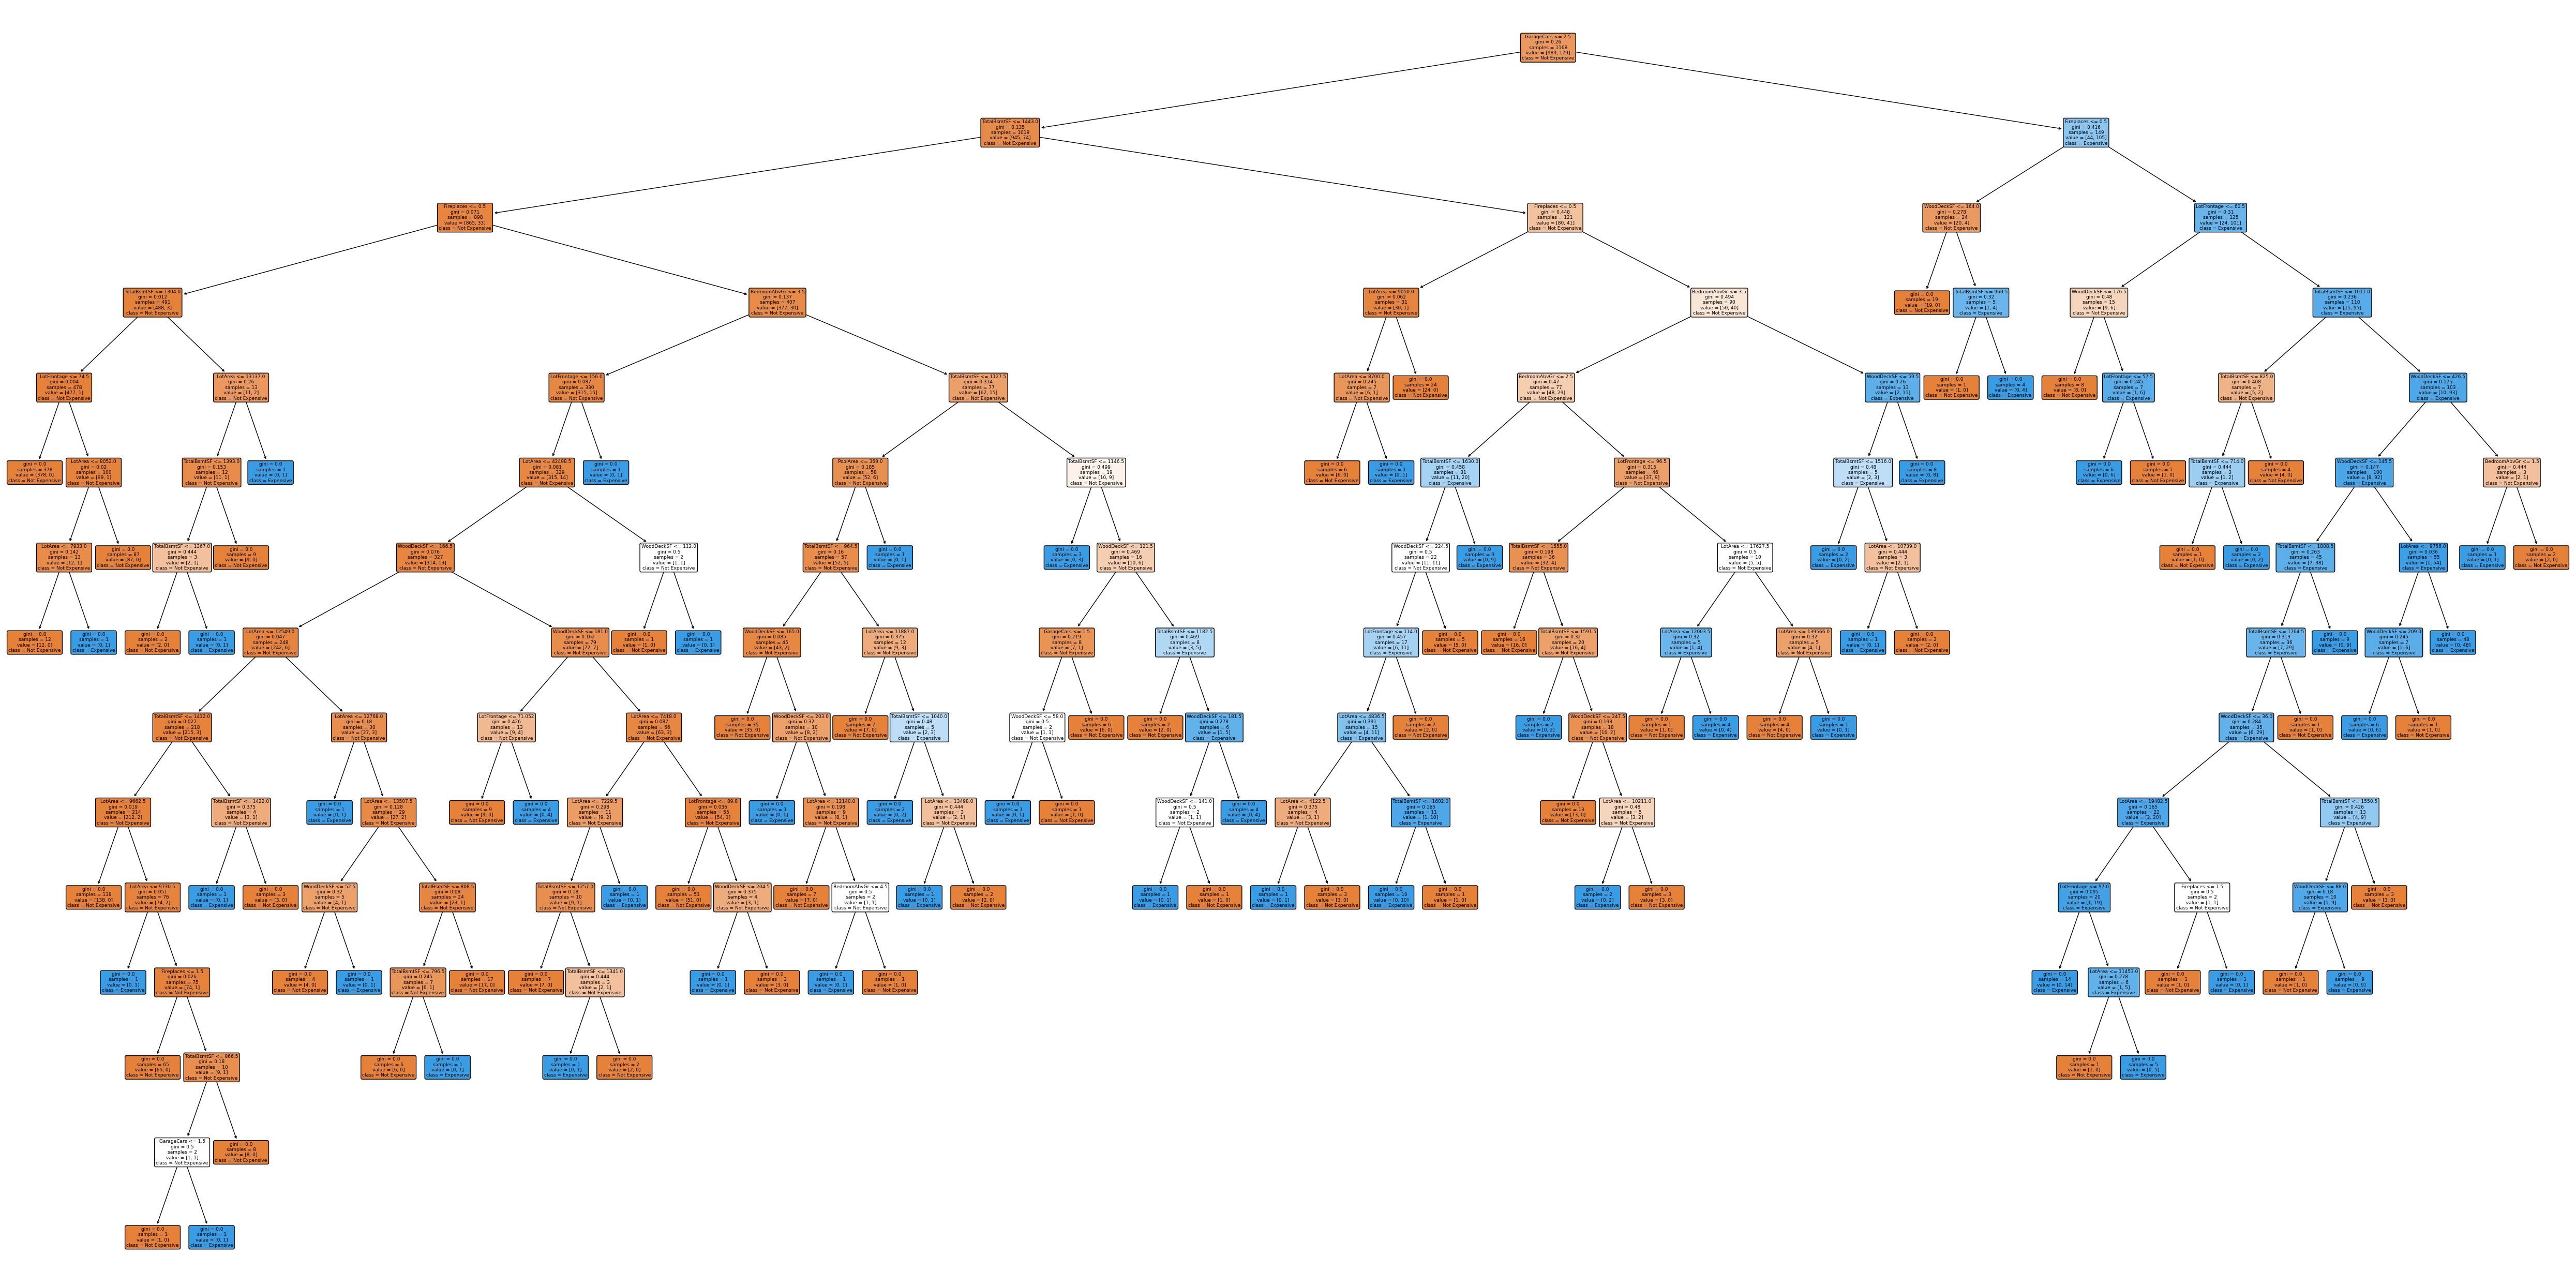

In [202]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True,
     rounded=True,
     class_names=['Not Expensive','Expensive'],
     feature_names= X.columns.tolist()
);

Our current tree is too big to distinguish what's going on. It has dozens, maybe hundreds of rules. In other words, our model is **very complex**, which is a common characteristic of models that suffer from overfitting.

To reduce the complexity (the size) of the tree and prevent overfitting, we can play with the hyperparameters of the tree. It's a process known as "pruning" the tree.

### **Exercise 1**: Pruning the tree

1. Tweak the parameters `max_depth` and `min_samples_leaf` of the decision tree, based on the Scikit-Learn documentation and the Statquest videos you watched following the Learning Platform.
2. Try to make the tree smaller.
3. Visualize again the tree.
4. Check the performance of your "small tree" on the train & test sets.

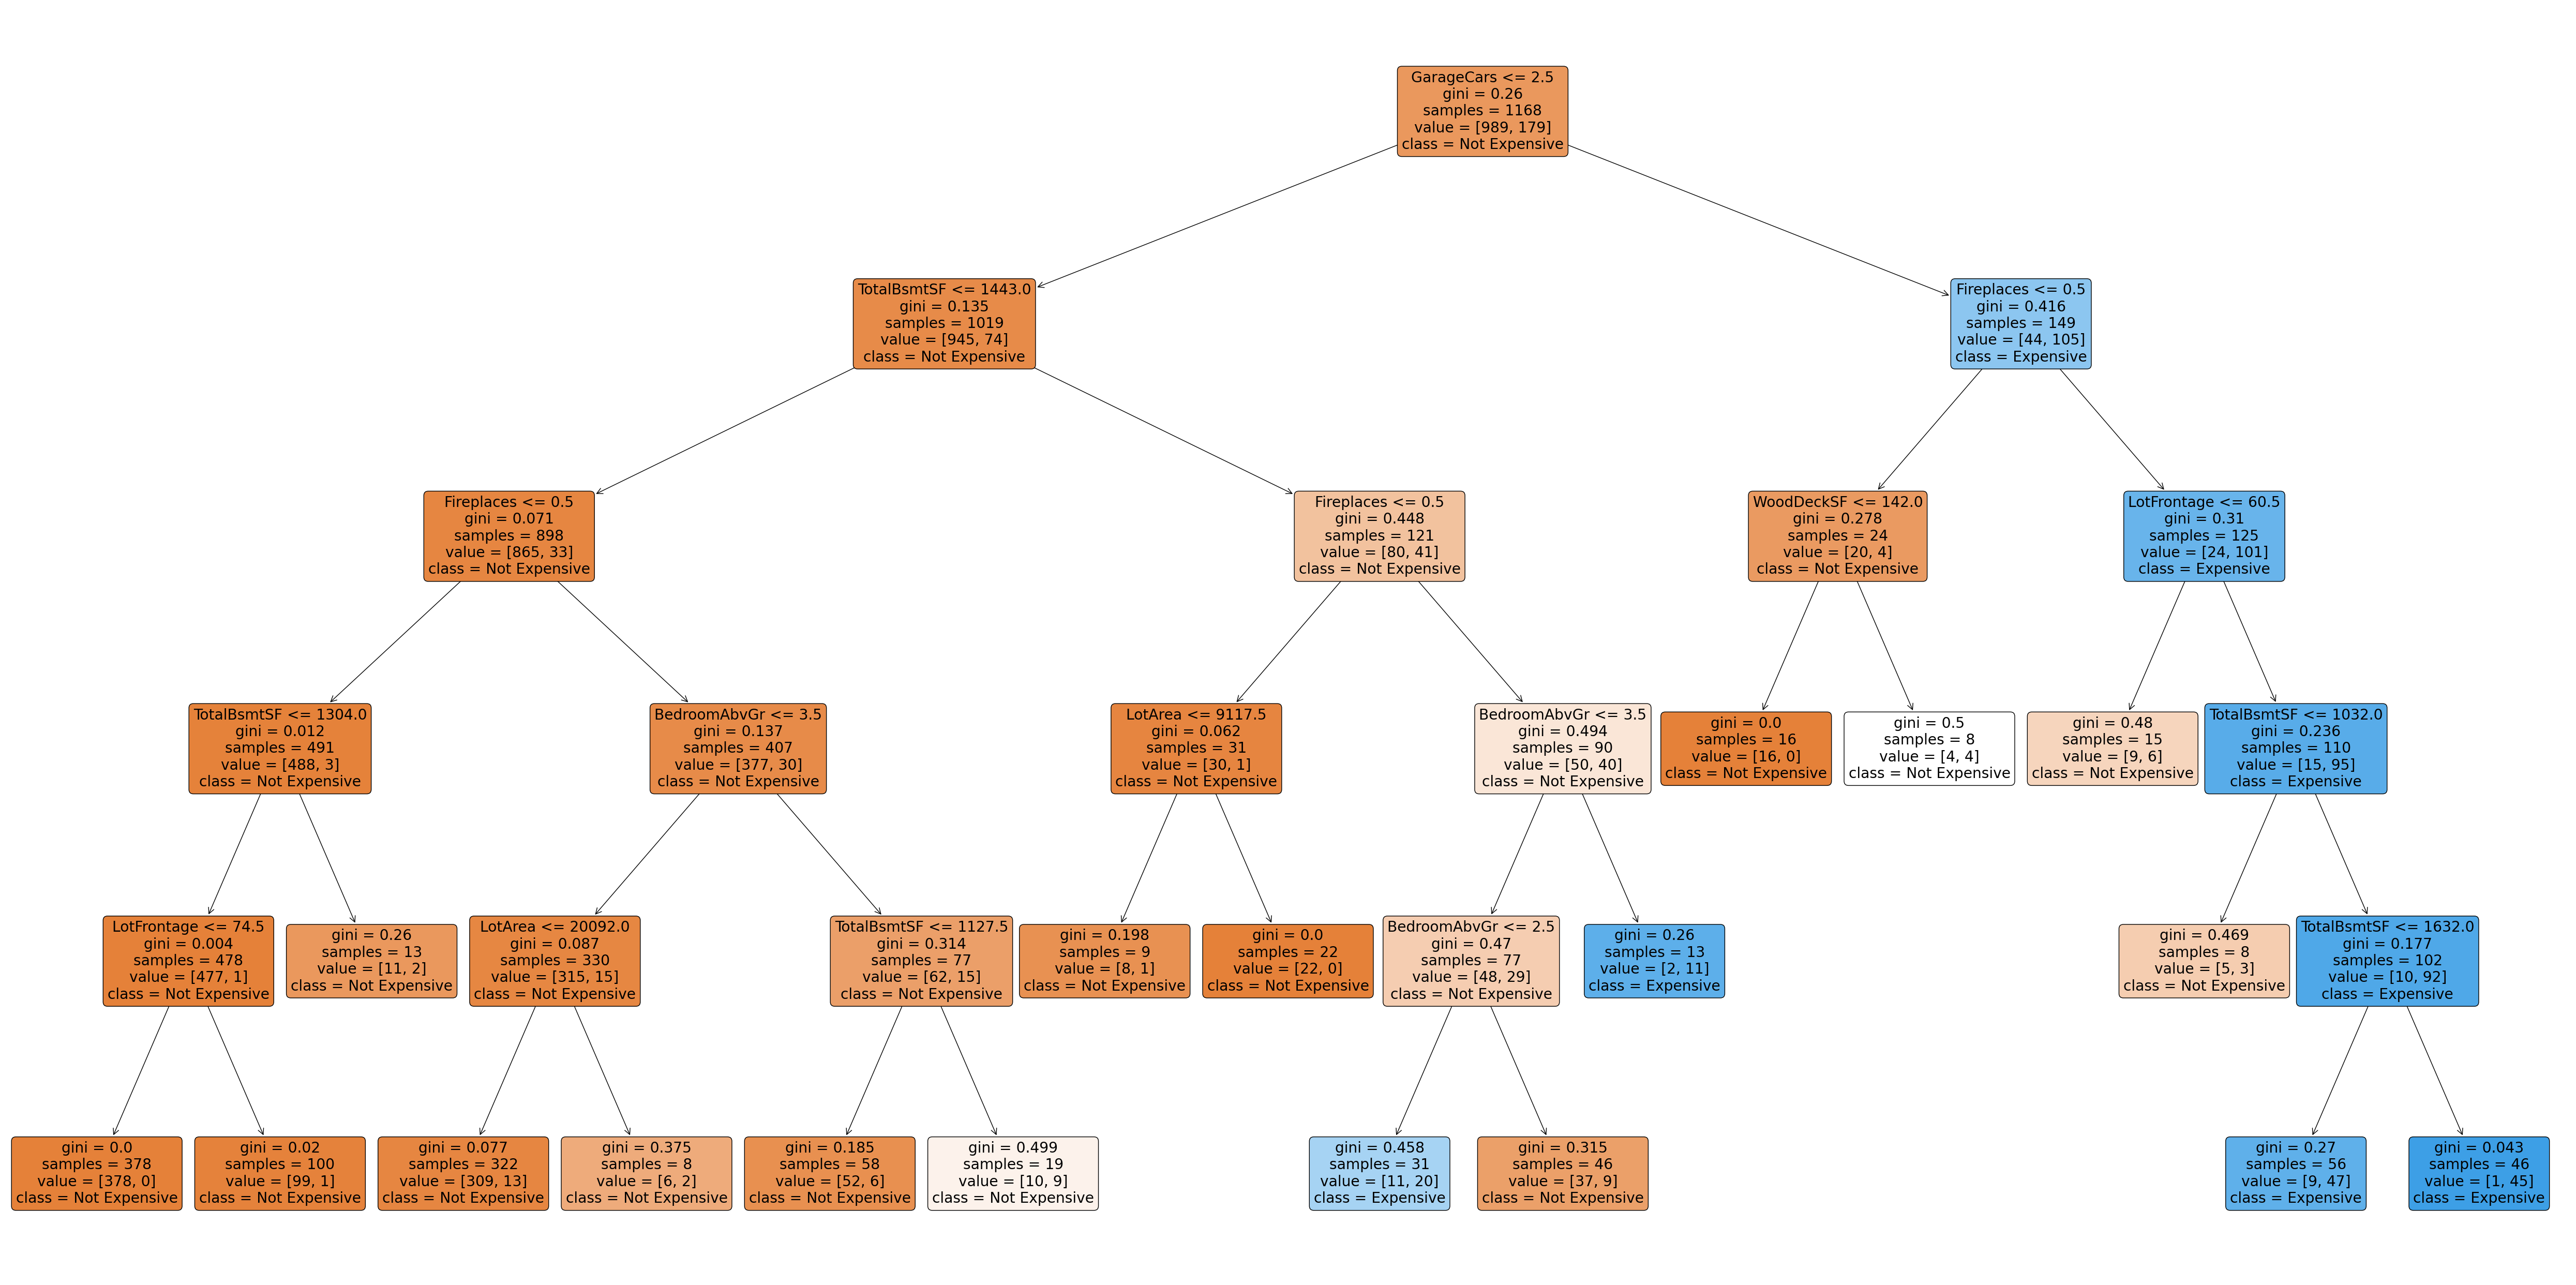

In [213]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Solution:
# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier(max_depth=5,
                                 min_samples_leaf=8
                                )
# 3. fit the model to the train data
my_tree.fit(X = X_num_imputed_train,
            y = y_train)
                                 
plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True,
     rounded=True,
     class_names=['Not Expensive','Expensive'],
     feature_names= X.columns.tolist()
);

In [214]:
y_pred_tree_train_2 = my_tree.predict(X_num_imputed_train)

In [215]:
accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train_2
              )

0.9323630136986302

In [216]:
y_pred_tree_test_2 = my_tree.predict(X_num_imputed_test)

In [217]:
accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test_2
              )

0.934931506849315